https://blog.csdn.net/kmsj0x00/article/details/79463376

灰度共生矩阵（GLCM）附Python代码



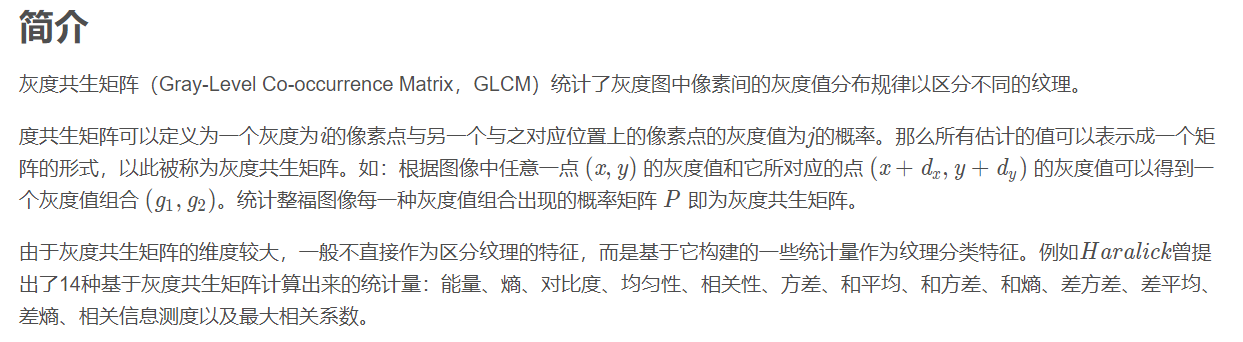

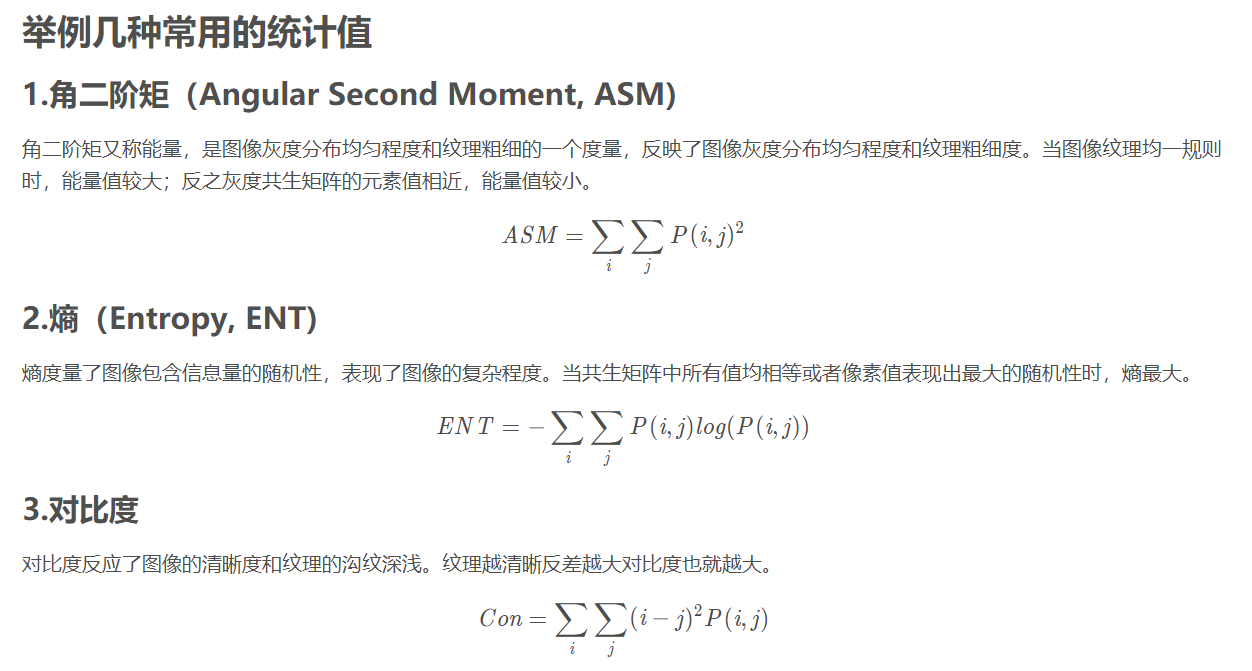

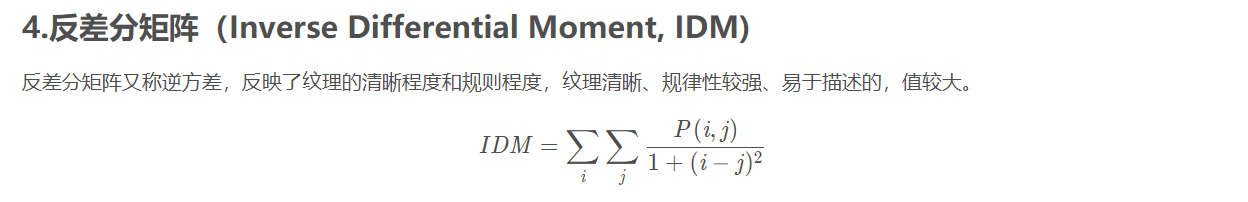

In [11]:
import cv2
import math

#定义最大灰度级数
gray_level = 16

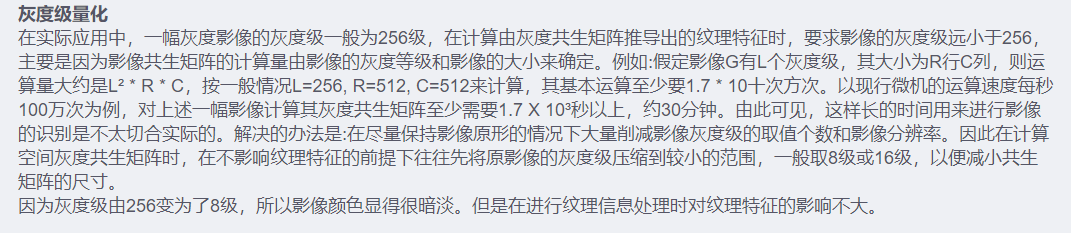

In [12]:
def maxGrayLevel(img):
    max_gray_level=0
    (height,width)=img.shape
    print(height,width)
    for y in range(height):
        for x in range(width):
            if img[y][x] > max_gray_level:
                max_gray_level = img[y][x]
    return max_gray_level+1

In [13]:
def getGlcm(input,d_x,d_y):
    srcdata=input.copy()
    ret=[[0.0 for i in range(gray_level)] for j in range(gray_level)]
    (height,width) = input.shape
    
    max_gray_level=maxGrayLevel(input)
    
    #若灰度级数大于gray_level，则将图像的灰度级缩小至gray_level，减小灰度共生矩阵的大小
    if max_gray_level > gray_level:
        for j in range(height):
            for i in range(width):
                srcdata[j][i] = srcdata[j][i]*gray_level / max_gray_level

    for j in range(height-d_y):
        for i in range(width-d_x):
            rows = srcdata[j][i]
            cols = srcdata[j + d_y][i+d_x]
            ret[rows][cols]+=1.0

    for i in range(gray_level):
        for j in range(gray_level):
            ret[i][j]/=float(height*width)

    return ret

In [14]:
def feature_computer(p):
    Con=0.0
    Eng=0.0
    Asm=0.0
    Idm=0.0
    for i in range(gray_level):
        for j in range(gray_level):
            Con+=(i-j)*(i-j)*p[i][j]
            Asm+=p[i][j]*p[i][j]
            Idm+=p[i][j]/(1+(i-j)*(i-j))
            if p[i][j]>0.0:
                Eng+=p[i][j]*math.log(p[i][j])
    return Asm,Con,-Eng,Idm


**看公式就十分清晰了**

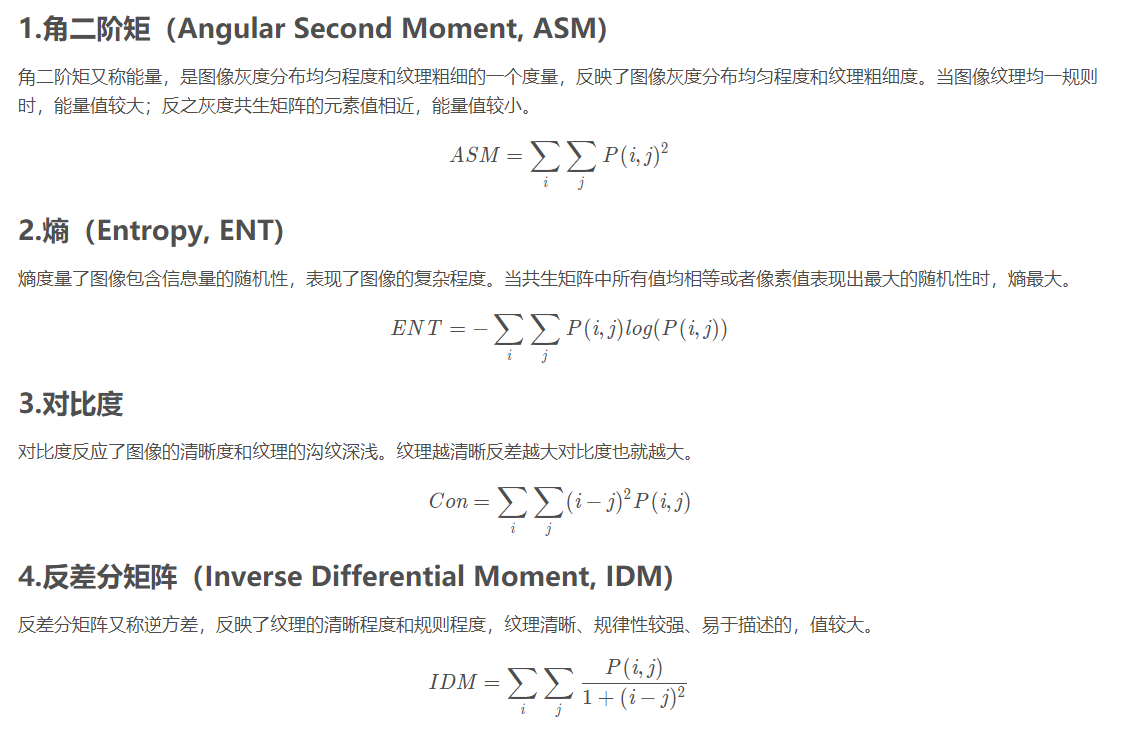

In [15]:
def test(image_name):
    img = cv2.imread(image_name)
    try:
        img_shape=img.shape
    except:
        print ('imread error')
        return

    img=cv2.resize(img,(int(img_shape[1]/2),int(img_shape[0]/2)),interpolation=cv2.INTER_CUBIC)

    img_gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    glcm_0=getGlcm(img_gray, 1,0)
    #glcm_1=getGlcm(src_gray, 0,1)
    #glcm_2=getGlcm(src_gray, 1,1)
    #glcm_3=getGlcm(src_gray, -1,1)

    asm,con,eng,idm=feature_computer(glcm_0)

    return [asm,con,eng,idm]

In [16]:
if __name__=='__main__':
    result = test("dujuan_1.jpg")
    print(result)

1728 2304
[0.07445780713116905, 0.21250984600051448, 2.9545368052123364, 0.9070472976934733]


角二阶矩，又称能量：Angular Second Moment, ASM 就是代码里的asm；

对比度：contrast ratio 就是代码里的con

反差分矩阵：Inverse Differential Moment, IDM  就是代码里的idm

由此看出：Eng+=p[i][j]×math.log(p[i][j]) return Asm,Con,-Eng,Idm；  Eng是指熵。


### 另外一个比较全，是b站up主给的github上面的代码

### 代码很长，不用全部看，且听我说：

### 它这里多了几个纹理特征：mean、variance、homogeneity、contrast、dissimilarity、entropy、energy、

### correlation、 auto correlation。我们可以把公式接用过来，放到上面那个人的代码里面去。

### 如：

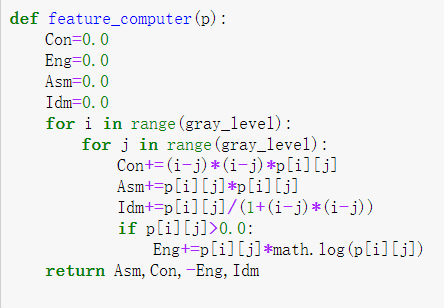

In [ ]:
mean += p[i][j] * i / (gray_level)**2

variance += p[i][j] * (i - mean)**2

Homogeneity +=  p[i][j] / (1.+(i-j)**2)

contrast += p[i][j] * (i-j)**2

dissimilarity += p[i][j] * np.abs(i-j)

eps=0.00001

entropy -= p[i][j] * np.log10(p[i][j] + eps)

energy += p[i][j]**2

correlation += ((i - mean) * (j - mean) * (p[i][j]**2))/variance

Auto_correlation += p[i][j] * i * j


https://www.bilibili.com/video/av540923718/

https://github.com/LinghuiXia/GLCM/blob/master/GLCM

### 既然我已经提取出来了，那么后面的代码也就不需要看了

### 不过后面封装成函数也挺不错，前面是把所有想要的结果封装成一个函数，也不错！！！

### 由于pip版本问题，下面第一段代码会报错，不过我已经在IDLE里面解决

### 而第二段代码，它还需要我们将图片进行压缩。如前面【灰度级量化】（注释）所示，如果未进行量化，会报这样的错误。

Traceback (most recent call last):
  File "C:\Users\12402\Desktop\main.py", line 37, in <module>
    glcm = get_glcm.calcu_glcm(img, mi, ma, nbit, slide_window, step, angle)
  File "C:\Users\12402\Desktop\get_glcm.py", line 45, in calcu_glcm
    glcm = np.zeros((nbit, nbit, len(step), len(angle), h, w), dtype=np.uint8)
numpy.core._exceptions._ArrayMemoryError: Unable to allocate 60.8 GiB for an array with shape (64, 64, 1, 1, 3456, 4608) and data type uint8

### 对了，前面预处理这一块我们少学了一点知识，就是将图片压缩到一定尺寸。我现在用来测试的图片都是（3456，4608）大小的。

### 后面代码不需要看了。

In [ ]:
# coding: utf-8
# The code is written by Linghui

import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from skimage import data
from math import floor, ceil
from skimage.feature import greycomatrix, greycoprops

def main():
    pass

def image_patch(img2, slide_window, h, w):

    image = img2
    window_size = slide_window
    patch = np.zeros((slide_window, slide_window, h, w), dtype=np.uint8)

    for i in range(patch.shape[2]):
        for j in range(patch.shape[3]):
            patch[:, :, i, j] = img2[i : i + slide_window, j : j + slide_window]
 
    return patch

def calcu_glcm(img, vmin=0, vmax=255, nbit=64, slide_window=5, step=[2], angle=[0]):
        
    mi, ma = vmin, vmax
    h, w = img.shape

    # Compressed gray range：vmin: 0-->0, vmax: 256-1 -->nbit-1
    bins = np.linspace(mi, ma+1, nbit+1)
    img1 = np.digitize(img, bins) - 1

    # (512, 512) --> (slide_window, slide_window, 512, 512)
    img2 = cv2.copyMakeBorder(img1, floor(slide_window/2), floor(slide_window/2)
                              , floor(slide_window/2), floor(slide_window/2), cv2.BORDER_REPLICATE) # 图像扩充

    patch = np.zeros((slide_window, slide_window, h, w), dtype=np.uint8)
    patch = image_patch(img2, slide_window, h, w)

    # Calculate GLCM (5, 5, 512, 512) --> (64, 64, 512, 512)
    # greycomatrix(image, distances, angles, levels=None, symmetric=False, normed=False)
    glcm = np.zeros((nbit, nbit, len(step), len(angle), h, w), dtype=np.uint8)
    for i in range(patch.shape[2]):
        for j in range(patch.shape[3]):
            glcm[:, :, :, :, i, j]= greycomatrix(patch[:, :, i, j], step, angle, levels=nbit)

    return glcm

def calcu_glcm_mean(glcm, nbit=64):
    '''
    calc glcm mean
    '''
    mean = np.zeros((glcm.shape[2], glcm.shape[3]), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i,j] * i / (nbit)**2

    return mean

def calcu_glcm_variance(glcm, nbit=64):
    '''
    calc glcm variance
    '''
    mean = np.zeros((glcm.shape[2], glcm.shape[3]), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i, j] * i / (nbit)**2

    variance = np.zeros((glcm.shape[2], glcm.shape[3]), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            variance += glcm[i, j] * (i - mean)**2

    return variance

def calcu_glcm_homogeneity(glcm, nbit=64):
    '''
    calc glcm Homogeneity
    '''
    Homogeneity = np.zeros((glcm.shape[2], glcm.shape[3]), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            Homogeneity += glcm[i,j] / (1.+(i-j)**2)

    return Homogeneity

def calcu_glcm_contrast(glcm, nbit=64):
    '''
    calc glcm contrast
    '''
    contrast = np.zeros((glcm.shape[2], glcm.shape[3]), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            contrast += glcm[i, j] * (i-j)**2

    return contrast

def calcu_glcm_dissimilarity(glcm, nbit=64):
    '''
    calc glcm dissimilarity
    '''
    dissimilarity = np.zeros((glcm.shape[2], glcm.shape[3]), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            dissimilarity += glcm[i, j] * np.abs(i-j)

    return dissimilarity

def calcu_glcm_entropy(glcm, nbit=64):
    '''
    calc glcm entropy 
    '''
    eps = 0.00001
    entropy = np.zeros((glcm.shape[2], glcm.shape[3]), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            entropy -= glcm[i, j] * np.log10(glcm[i, j] + eps)

    return entropy

def calcu_glcm_energy(glcm, nbit=64):
    '''
    calc glcm energy or second moment
    '''
    energy = np.zeros((glcm.shape[2], glcm.shape[3]), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            energy += glcm[i, j]**2

    return energy

def calcu_glcm_correlation(glcm, nbit=64):
    '''
    calc glcm correlation (Unverified result)
    '''
    
    mean = np.zeros((glcm.shape[2], glcm.shape[3]), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            mean += glcm[i, j] * i / (nbit)**2

    variance = np.zeros((glcm.shape[2], glcm.shape[3]), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            variance += glcm[i, j] * (i - mean)**2
    
    correlation = np.zeros((glcm.shape[2], glcm.shape[3]), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            correlation += ((i - mean) * (j - mean) * (glcm[i, j]**2))/variance

    return correlation

def calcu_glcm_Auto_correlation(glcm, nbit=64):
    '''
    calc glcm auto correlation
    '''
    Auto_correlation = np.zeros((glcm.shape[2], glcm.shape[3]), dtype=np.float32)
    for i in range(nbit):
        for j in range(nbit):
            Auto_correlation += glcm[i, j] * i * j

    return Auto_correlation


if __name__ == '__main__':
    main()

In [ ]:
# coding: utf-8
# The code is written by Linghui

import numpy as np
from skimage import data
from matplotlib import pyplot as plt
import get_glcm
import time
from PIL import Image

def main():
    pass


if __name__ == '__main__':
    
    main()
     
    start = time.time()

    print('---------------0. Parameter Setting-----------------')
    nbit = 64 # gray levels
    mi, ma = 0, 255 # max gray and min gray
    slide_window = 7 # sliding window
    # step = [2, 4, 8, 16] # step
    # angle = [0, np.pi/4, np.pi/2, np.pi*3/4] # angle or direction
    step = [2]
    angle = [0]
    print('-------------------1. Load Data---------------------')
    image = r"dujuan_1.jpg"
    img = np.array(Image.open(image)) # If the image has multi-bands, it needs to be converted to grayscale image
    img = np.uint8(255.0 * (img - np.min(img))/(np.max(img) - np.min(img))) # normalization
    h, w = img.shape
    print('------------------2. Calcu GLCM---------------------')
    glcm = get_glcm.calcu_glcm(img, mi, ma, nbit, slide_window, step, angle)
    print('-----------------3. Calcu Feature-------------------')
    # 
    for i in range(glcm.shape[2]):
        for j in range(glcm.shape[3]):
            glcm_cut = np.zeros((nbit, nbit, h, w), dtype=np.float32)
            glcm_cut = glcm[:, :, i, j, :, :]
            mean = get_glcm.calcu_glcm_mean(glcm_cut, nbit)
            variance = get_glcm.calcu_glcm_variance(glcm_cut, nbit)
            homogeneity = get_glcm.calcu_glcm_homogeneity(glcm_cut, nbit)
            contrast = get_glcm.calcu_glcm_contrast(glcm_cut, nbit)
            dissimilarity = get_glcm.calcu_glcm_dissimilarity(glcm_cut, nbit)
            entropy = get_glcm.calcu_glcm_entropy(glcm_cut, nbit)
            energy = get_glcm.calcu_glcm_energy(glcm_cut, nbit)
            correlation = get_glcm.calcu_glcm_correlation(glcm_cut, nbit)
            Auto_correlation = get_glcm.calcu_glcm_Auto_correlation(glcm_cut, nbit)
    print('---------------4. Display and Result----------------')
    plt.figure(figsize=(10, 4.5))
    font = {'family' : 'Times New Roman',
    'weight' : 'normal',
    'size'   : 12,
    }

    plt.subplot(2,5,1)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.axis('off')
    plt.imshow(img, cmap ='gray')
    plt.title('Original', font)

    plt.subplot(2,5,2)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.axis('off')
    plt.imshow(mean, cmap ='gray')
    plt.title('Mean', font)

    plt.subplot(2,5,3)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.axis('off')
    plt.imshow(variance, cmap ='gray')
    plt.title('Variance', font)

    plt.subplot(2,5,4)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.axis('off')
    plt.imshow(homogeneity, cmap ='gray')
    plt.title('Homogeneity', font)

    plt.subplot(2,5,5)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.axis('off')
    plt.imshow(contrast, cmap ='gray')
    plt.title('Contrast', font)

    plt.subplot(2,5,6)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.axis('off')
    plt.imshow(dissimilarity, cmap ='gray')
    plt.title('Dissimilarity', font)

    plt.subplot(2,5,7)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.axis('off')
    plt.imshow(entropy, cmap ='gray')
    plt.title('Entropy', font)

    plt.subplot(2,5,8)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.axis('off')
    plt.imshow(energy, cmap ='gray')
    plt.title('Energy', font)

    plt.subplot(2,5,9)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.axis('off')
    plt.imshow(correlation, cmap ='gray')
    plt.title('Correlation', font)

    plt.subplot(2,5,10)
    plt.tick_params(labelbottom=False, labelleft=False)
    plt.axis('off')
    plt.imshow(Auto_correlation, cmap ='gray')
    plt.title('Auto Correlation', font)

    plt.tight_layout(pad=0.5)
    plt.savefig('E:/Study/!Blibli/3.GLCM/GLCM/GLCM_Features.png'
                , format='png'
                , bbox_inches = 'tight'
                , pad_inches = 0
                , dpi=300)
    plt.show()

    end = time.time()
    print('Code run time:', end - start)